In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

# Activation functions

## ReLU

In [2]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x <= 0, 0, 1)

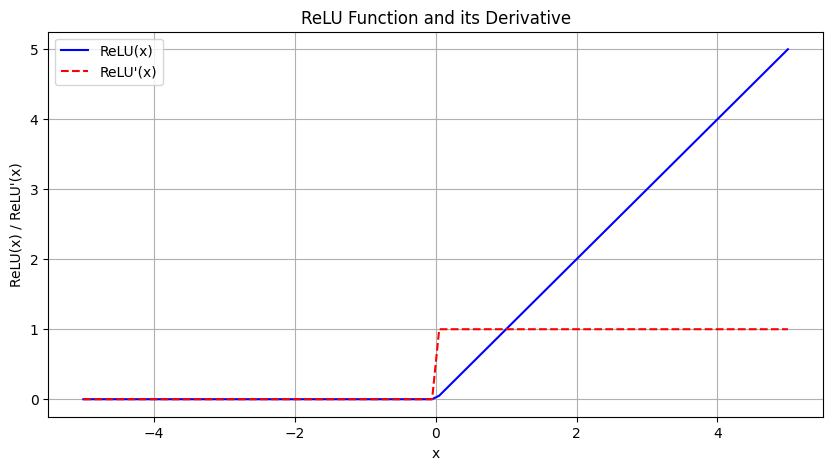

In [3]:
x_values = np.linspace(-5, 5, 100)

relu_values = relu(x_values)
relu_derivative_values = relu_derivative(x_values)

plt.figure(figsize=(10, 5))
plt.plot(x_values, relu_values, label='ReLU(x)', color='blue')
plt.plot(x_values, relu_derivative_values, label="ReLU'(x)", color='red', linestyle='--')
plt.title('ReLU Function and its Derivative')
plt.xlabel('x')
plt.ylabel('ReLU(x) / ReLU\'(x)')
plt.grid(True)
plt.legend()

plt.show()

## ReLU6

In [ ]:
def relu6(x):
    return np.minimum(np.maximum(0, x), 6)

def relu6_derivative(x):
    return np.where((x > 0) & (x < 6), 1, 0)

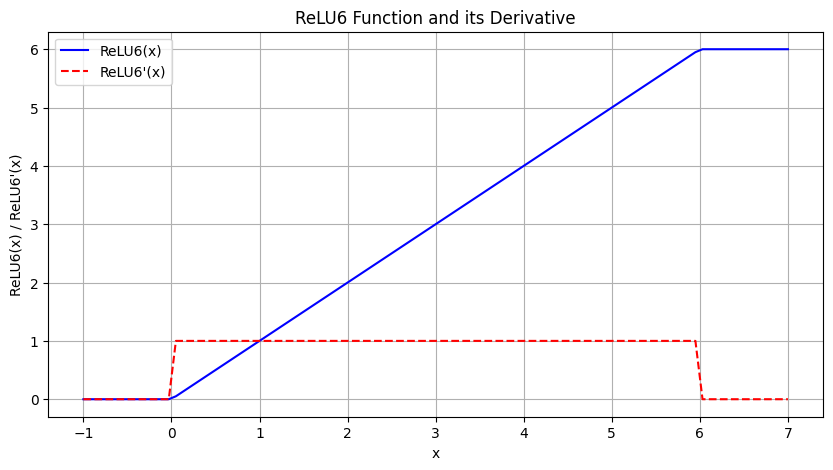

In [4]:
x_values = np.linspace(-1, 7, 100)

relu6_values = relu6(x_values)
relu6_derivative_values = relu6_derivative(x_values)

plt.figure(figsize=(10, 5))
plt.plot(x_values, relu6_values, label='ReLU6(x)', color='blue')
plt.plot(x_values, relu6_derivative_values, label="ReLU6'(x)", color='red', linestyle='--')
plt.title('ReLU6 Function and its Derivative')
plt.xlabel('x')
plt.ylabel('ReLU6(x) / ReLU6\'(x)')
plt.grid(True)
plt.legend()

plt.show()

## ELU

In [ ]:
alpha = 1.0

def elu(x):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x):
    return np.where(x > 0, 1, elu(x) + alpha)

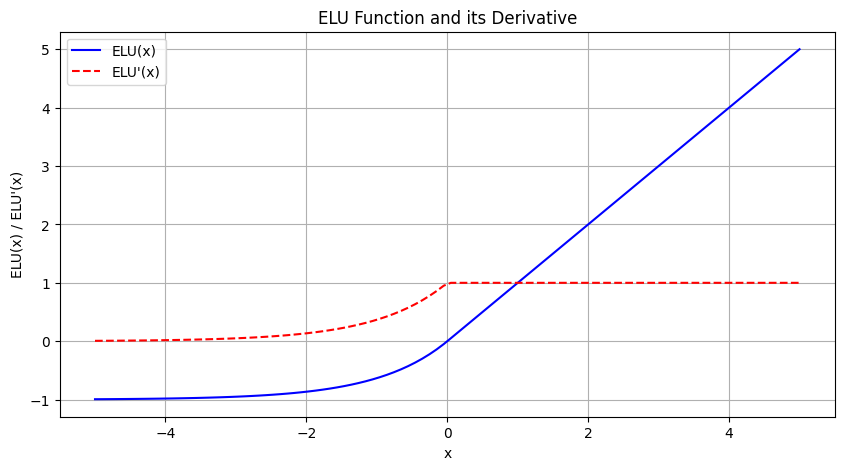

In [5]:
x_values = np.linspace(-5, 5, 100)

elu_values = elu(x_values)
elu_derivative_values = elu_derivative(x_values)

plt.figure(figsize=(10, 5))
plt.plot(x_values, elu_values, label='ELU(x)', color='blue')
plt.plot(x_values, elu_derivative_values, label="ELU'(x)", color='red', linestyle='--')
plt.title('ELU Function and its Derivative')
plt.xlabel('x')
plt.ylabel('ELU(x) / ELU\'(x)')
plt.grid(True)
plt.legend()

plt.show()

## SiLU

In [ ]:
def silu(x):
    return x * (1 / (1 + np.exp(-x)))

def silu_derivative(x):
    sigma = 1 / (1 + np.exp(-x))
    return sigma + x * sigma * (1 - sigma)

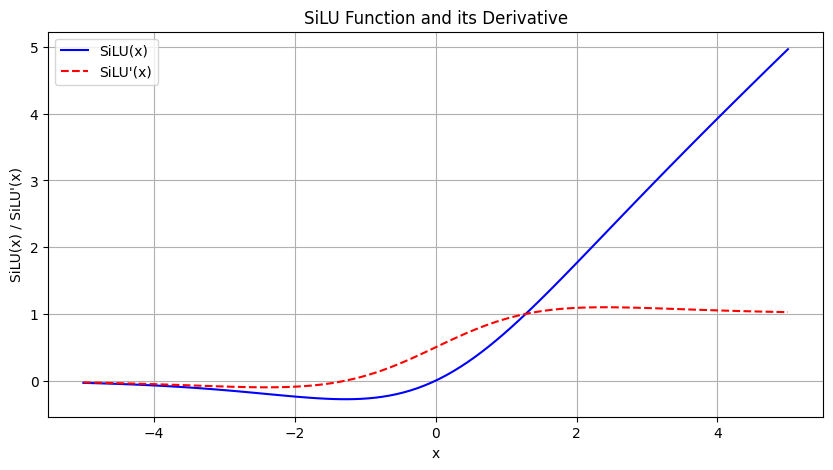

In [6]:
x_values = np.linspace(-5, 5, 100)

silu_values = silu(x_values)
silu_derivative_values = silu_derivative(x_values)

plt.figure(figsize=(10, 5))
plt.plot(x_values, silu_values, label='SiLU(x)', color='blue')
plt.plot(x_values, silu_derivative_values, label="SiLU'(x)", color='red', linestyle='--')
plt.title('SiLU Function and its Derivative')
plt.xlabel('x')
plt.ylabel('SiLU(x) / SiLU\'(x)')
plt.grid(True)
plt.legend()

plt.show()

## GeLU

In [ ]:
def gelu(x):
    return x * 0.5 * (1 + erf(x / np.sqrt(2)))

def gelu_derivative(x):
    return 0.5 * (1 + erf(x / np.sqrt(2))) + (x / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

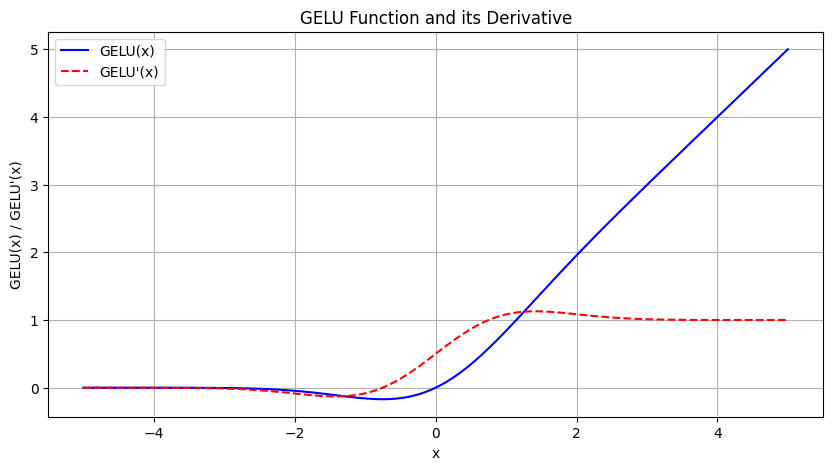

In [9]:
x_values = np.linspace(-5, 5, 100)

gelu_values = gelu(x_values)
gelu_derivative_values = gelu_derivative(x_values)

plt.figure(figsize=(10, 5))
plt.plot(x_values, gelu_values, label='GELU(x)', color='blue')
plt.plot(x_values, gelu_derivative_values, label="GELU'(x)", color='red', linestyle='--')
plt.title('GELU Function and its Derivative')
plt.xlabel('x')
plt.ylabel('GELU(x) / GELU\'(x)')
plt.grid(True)
plt.legend()

plt.show()

# Losses

## L1 Loss

In [44]:
def l1_loss(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

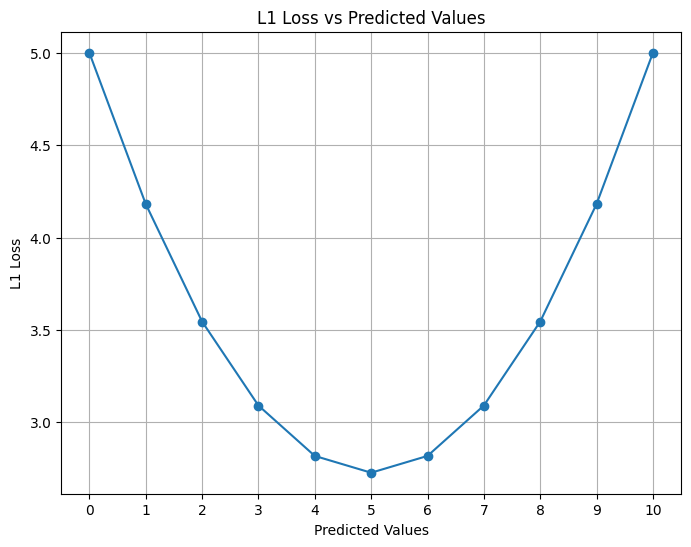

In [45]:
y_true = np.arange(11)

y_preds = np.arange(11)

losses = [l1_loss(y_true, y_pred) for y_pred in y_preds]

plt.figure(figsize=(8, 6))
plt.plot(y_preds, losses, marker='o', linestyle='-')
plt.title('L1 Loss vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('L1 Loss')
plt.xticks(np.arange(11))
plt.grid(True)
plt.show()

## BCE Loss

In [42]:
def binary_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

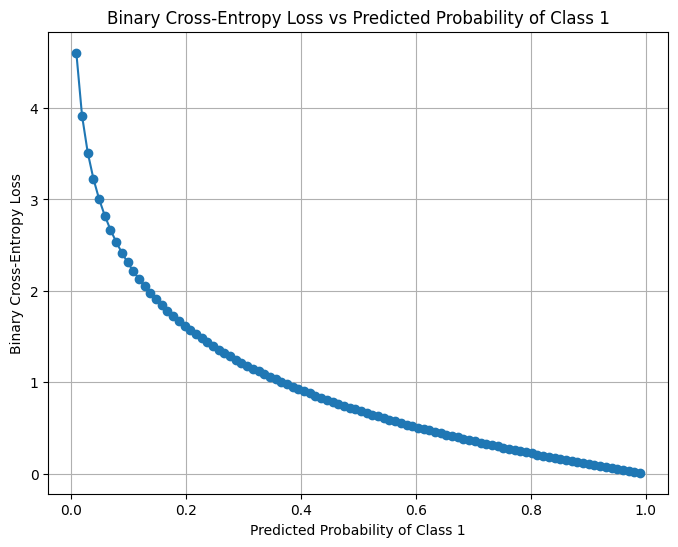

In [43]:
y_true = 1

y_preds = np.linspace(0.01, 0.99, 100)

losses = [binary_cross_entropy_loss(y_true, y_pred) for y_pred in y_preds]

plt.figure(figsize=(8, 6))
plt.plot(y_preds, losses, marker='o', linestyle='-')
plt.title('Binary Cross-Entropy Loss vs Predicted Probability of Class 1')
plt.xlabel('Predicted Probability of Class 1')
plt.ylabel('Binary Cross-Entropy Loss')
plt.grid(True)
plt.show()

## KLDiv

In [36]:
def kl_divergence_loss(y_true, y_pred, epsilon=1e-15):
    return y_true * np.log(y_true / y_pred)

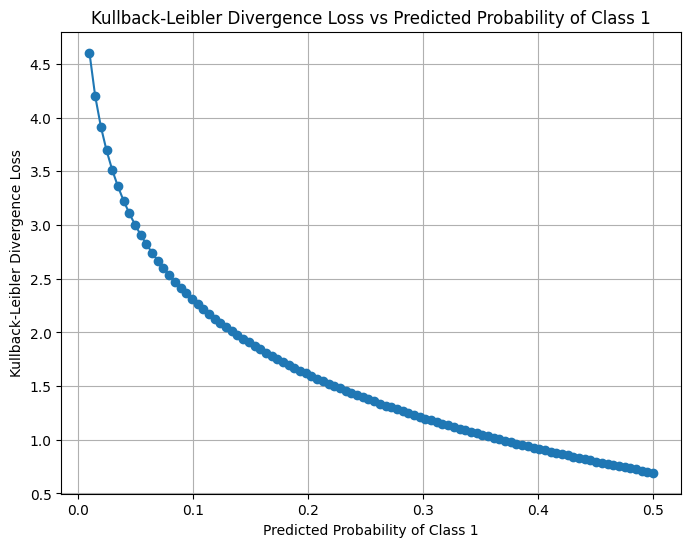

In [40]:
y_true = np.ones(100)
y_preds = np.linspace(0.01, 0.5, 100)

losses = kl_divergence_loss(y_true,y_preds)

plt.figure(figsize=(8, 6))
plt.plot(y_preds, losses, marker='o', linestyle='-')
plt.title('Kullback-Leibler Divergence Loss vs Predicted Probability of Class 1')
plt.xlabel('Predicted Probability of Class 1')
plt.ylabel('Kullback-Leibler Divergence Loss')
plt.grid(True)
plt.show()

## SmoothL1

In [74]:
def smooth_l1_loss(x, threshold=1.0):
    loss = np.where(np.abs(x) < threshold,
                    0.5 * x**2,
                    threshold * (np.abs(x) - 0.5 * threshold))
    return loss

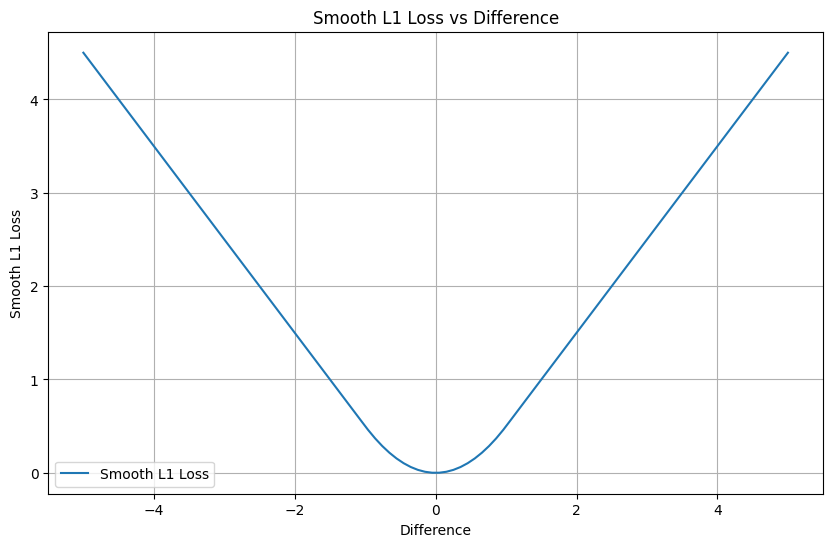

In [76]:
x_values = np.linspace(-5, 5, 100)

loss_values = smooth_l1_loss(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, loss_values, label='Smooth L1 Loss')
plt.title('Smooth L1 Loss vs Difference')
plt.xlabel('Difference')
plt.ylabel('Smooth L1 Loss')
plt.legend()
plt.grid(True)
plt.show()